In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from numpy.random import Generator, PCG64
import pandas as pd
from scipy.optimize import curve_fit
rg = Generator(PCG64(12345))

import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from matplotlib.pyplot import cm
from matplotlib.animation import FuncAnimation
from matplotlib.ticker import FormatStrFormatter

import seaborn as sns
sns.set()

In [19]:
from numpy import *
import numpy as np
import statsmodels.api as sm
import matplotlib.pylab as plt
from importlib import reload
import seaborn as sns
from sklearn import linear_model
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [20]:
from scipy.stats import multivariate_normal

In [21]:
rv_mean = [0, 0]  # mean of x and y  
rv_cov = [[1,0.5], [0.5,1]]  # covariance matrix of x and y
rv = multivariate_normal.rvs(rv_mean, rv_cov, size=252)
rv1 = rv[:,1]
rv2 = rv[:,0]
def CIR_SimulateM(r0,A,B,sigma,Deltat,N,rv):
    rt = np.empty_like(rv1)
    rt[0] = r0
    for i in range(1,N):
     rt[i] = rt[i-1]+A*(B-rt[i-1])*Deltat+sigma*(rt[i-1]*Deltat)**0.5*rv[i]+0.5*sigma**2*(rv[i]**2-1)*Deltat
    return rt

In [22]:
def simulate():
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    for i in range (1,1001):
        rv_mean = [0, 0]  # mean of x and y  
        rv_cov = [[1,0.5], [0.5,1]]  # covariance matrix of x and y
        rv = multivariate_normal.rvs(rv_mean, rv_cov, size=252)
        rv1 = rv[:,1]
        rv2 = rv[:,0]
        cir_simulation = CIR_SimulateM(0.5, 2, 0.1,0.04, 1/252,250,rv1)
        cir_simulation1 = CIR_SimulateM(0.7, 3, 0.03,0.05, 1/252,250,rv2)
        df1[i] =  cir_simulation
        df2[i] = cir_simulation1
    return df1, df2

In [23]:
a, b = simulate()

In [24]:
cir_simulation= a.dropna()

In [25]:
cir_simulation

,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
1,0.495243,0.495253,0.495397,0.500331,0.494579,0.496561,0.498776,0.498186,0.496874,0.498420,...,0.496576,0.500955,0.497494,0.497689,0.495297,0.497100,0.493986,0.497043,0.497833,0.496255
2,0.493516,0.492033,0.490561,0.494574,0.493607,0.491130,0.497460,0.495648,0.494331,0.493051,...,0.496232,0.499344,0.494157,0.494662,0.491780,0.491065,0.492019,0.494804,0.493421,0.493947
3,0.488039,0.488679,0.489087,0.492749,0.489052,0.492075,0.496688,0.490549,0.490426,0.493834,...,0.492052,0.495363,0.489807,0.495168,0.486651,0.487240,0.486849,0.494259,0.492951,0.488403
4,0.482574,0.485738,0.486547,0.491143,0.485391,0.489393,0.491682,0.487032,0.487723,0.493042,...,0.491018,0.492551,0.488455,0.491476,0.483583,0.485180,0.483081,0.491333,0.488699,0.484126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.153107,0.173119,0.140831,0.152190,0.153562,0.151690,0.153915,0.154896,0.154709,0.149039,...,0.158493,0.161280,0.171008,0.152969,0.165534,0.167313,0.141705,0.147515,0.151760,0.138744
246,0.152418,0.173067,0.139321,0.152664,0.153096,0.151654,0.154439,0.155439,0.153714,0.149254,...,0.158933,0.159532,0.170594,0.151751,0.163877,0.166979,0.142148,0.146844,0.152212,0.138234
247,0.151251,0.170583,0.138955,0.152366,0.153780,0.151740,0.154694,0.154258,0.153864,0.148582,...,0.158193,0.159207,0.168880,0.150946,0.164695,0.167815,0.141222,0.145987,0.152342,0.138654
248,0.151834,0.170010,0.138940,0.150491,0.155199,0.151053,0.154443,0.154511,0.154317,0.147163,...,0.157667,0.160080,0.168843,0.150456,0.165939,0.168460,0.140404,0.145355,0.151071,0.139462


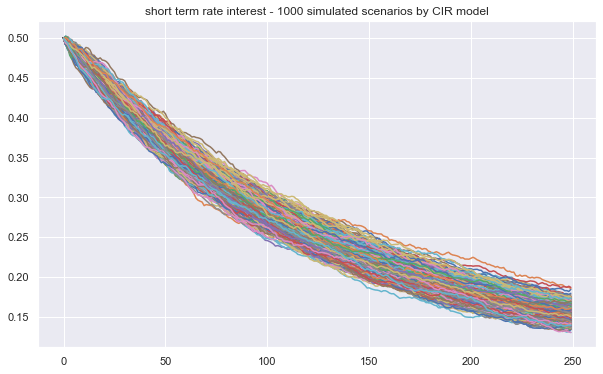

In [26]:
cir_simulation.plot(figsize=(10,6), legend=False, title='short term rate interest - 1000 simulated scenarios by CIR model')

In [27]:
def simulate_table(mean_rates_per_period_cir):
    N=250
    df = pd.DataFrame()
    y = np.zeros(N)
    x1 = np.zeros(N)
    x2 = np.zeros(N)
    dt=1/252
    for i in range(1,N):
        df['rt'] = mean_rates_per_period_cir
        y[i] = (mean_rates_per_period_cir[i]-mean_rates_per_period_cir[i-1])/np.sqrt(mean_rates_per_period_cir[i-1])
        df['y'] = y
        x1[i] =dt/np.sqrt(mean_rates_per_period_cir[i-1])
        df['x1'] = x1
        x2[i] = np.sqrt(mean_rates_per_period_cir[i-1])*dt
        df['x2'] = x2
    
    return df

In [28]:
cir_simulation[1]

0      0.500000
1      0.495243
2      0.493516
3      0.488039
4      0.482574
         ...   
245    0.153107
246    0.152418
247    0.151251
248    0.151834
249    0.150885
Name: 1, Length: 250, dtype: float64

In [29]:
df = simulate_table(cir_simulation[1])

In [30]:
df =df.dropna()

In [65]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model # for each observation, fit the maturity curve 

param_fits = zeros((len(cir_simulation.columns),3))
param_names = ['a\N{SUBSCRIPT ONE}','b\N{SUBSCRIPT ONE}','\u03C3\N{SUBSCRIPT ONE}']
for i in range(1,len(cir_simulation.columns)):
    data = simulate_table(cir_simulation[i])
    X = data[['x1','x2']]
    y = data['y']
    model = sm.regression.linear_model.OLS(y, X)
    results = model.fit()
    param_fits[i,0] = -results.params[1]
    param_fits[i,1] = results.params[0]/param_fits[i,0]
        
    model1 = sm.OLS(y, X).fit()
    dt=1/252
    param_fits[i,2] = np.sqrt((model1.ssr)/(len(data)*dt))

        
# convert into a dataframe for conv. 
param_fits = pd.DataFrame(param_fits,  columns=param_names)


In [66]:
param_fits

,a₁,b₁,σ₁
0,0.000000,0.000000,0.000000
1,2.248141,0.110181,0.037898
2,1.813351,0.106676,0.039166
3,1.994572,0.080156,0.041980
4,2.169794,0.103736,0.038800
...,...,...,...
995,2.331302,0.128280,0.040950
996,2.336326,0.130591,0.039623
997,2.316279,0.103961,0.038869
998,2.060543,0.091848,0.038074


In [67]:
param_fits.describe()

,a₁,b₁,σ₁
count,1000.000000,1000.000000,1000.000000
mean,2.028597,0.100226,0.039722
std,0.238835,0.019575,0.002121
min,0.000000,0.000000,0.000000
25%,1.871058,0.088474,0.038627
50%,2.017563,0.100943,0.039735
75%,2.178747,0.113246,0.040933
max,2.839456,0.152272,0.045249


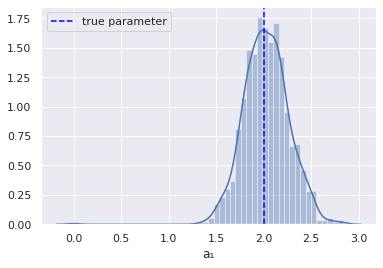

In [73]:
d1 = sns.distplot(param_fits.loc[:,'a\N{SUBSCRIPT ONE}'], bins=50)
plt.rcParams['font.sans-serif']=['SimHei']
plt.axvline(2, color='blue', ls='dashed', label = 'true parameter', lw=1.5)
plt.legend()

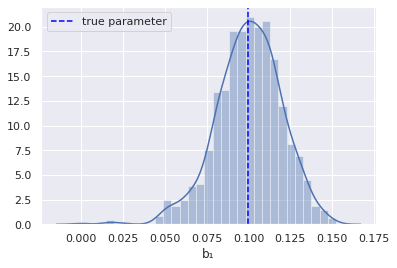

In [75]:
d2 = sns.distplot(param_fits.loc[:,'b\N{SUBSCRIPT ONE}'])
plt.axvline(0.1, color='blue', ls='dashed', label = 'true parameter', lw=1.5)
plt.legend()


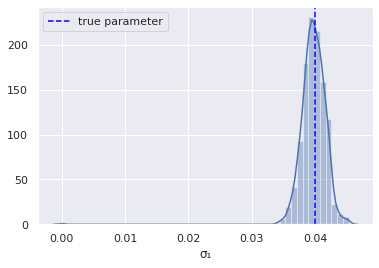

In [76]:
d3 = sns.distplot(param_fits.loc[:,'\u03C3\N{SUBSCRIPT ONE}'])
plt.axvline(0.04, color='blue', ls='dashed', label = 'true parameter', lw=1.5)
plt.legend()
d3

###############################################################################################


In [77]:
cir_simulation1 = b.dropna()

In [78]:
cir_simulation1

,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
0,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,...,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000
1,0.692348,0.686948,0.688775,0.698415,0.694108,0.691581,0.699905,0.690294,0.692699,0.690849,...,0.695205,0.697248,0.694554,0.693219,0.695399,0.689857,0.690741,0.689509,0.692064,0.690321
2,0.683464,0.677615,0.681080,0.688628,0.690114,0.682327,0.688959,0.677775,0.684884,0.681105,...,0.685001,0.690822,0.687881,0.684729,0.685552,0.681642,0.680965,0.680038,0.678618,0.684891
3,0.673735,0.668459,0.679544,0.680711,0.681356,0.675248,0.684391,0.667502,0.680676,0.677398,...,0.677565,0.684784,0.678447,0.675066,0.676609,0.673881,0.675636,0.670668,0.671678,0.674371
4,0.664298,0.659727,0.674059,0.671351,0.670567,0.667417,0.672147,0.663107,0.674509,0.665990,...,0.669359,0.676599,0.669966,0.666583,0.671135,0.667832,0.668278,0.658470,0.664892,0.663324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.066254,0.057258,0.057130,0.071159,0.063021,0.059084,0.062701,0.065030,0.070156,0.059791,...,0.068151,0.063027,0.067707,0.060865,0.063437,0.063007,0.060983,0.064262,0.067106,0.067146
246,0.066815,0.058392,0.057116,0.070491,0.062915,0.058064,0.061776,0.065148,0.068725,0.060009,...,0.067021,0.062284,0.066613,0.059797,0.063864,0.061954,0.061037,0.063581,0.066214,0.066724
247,0.066340,0.058114,0.057543,0.071073,0.062602,0.057577,0.061387,0.063968,0.067867,0.060317,...,0.066924,0.061483,0.065983,0.058676,0.064549,0.062999,0.060244,0.063160,0.066018,0.066336
248,0.066209,0.058721,0.058357,0.070576,0.062950,0.057137,0.062719,0.064087,0.067985,0.060566,...,0.064937,0.063023,0.066215,0.058170,0.064507,0.062906,0.059177,0.062587,0.065022,0.066845


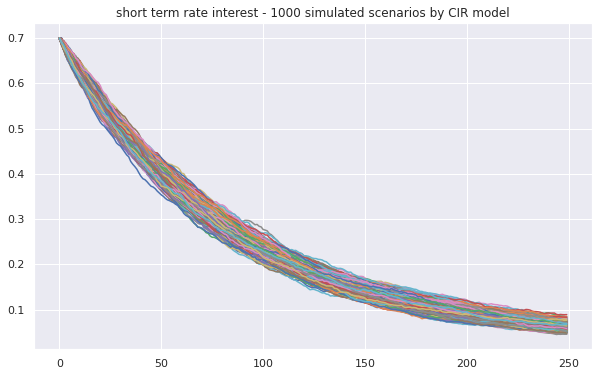

In [79]:
cir_simulation1.plot(figsize=(10,6), legend=False, title='short term rate interest - 1000 simulated scenarios by CIR model')

In [80]:
def simulate_table(mean_rates_per_period_cir):
    N= len(cir_simulation1)
    df = pd.DataFrame()
    y = np.zeros(N)
    x1 = np.zeros(N)
    x2 = np.zeros(N)
    dt=1/252
    for i in range(1,N):
        df['rt'] = mean_rates_per_period_cir
        y[i] = (mean_rates_per_period_cir[i]-mean_rates_per_period_cir[i-1])/np.sqrt(mean_rates_per_period_cir[i-1])
        df['y'] = y
        x1[i] =dt/np.sqrt(mean_rates_per_period_cir[i-1])
        df['x1'] = x1
        x2[i] = np.sqrt(mean_rates_per_period_cir[i-1])*dt
        df['x2'] = x2
    
    return df

In [88]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model # for each observation, fit the maturity curve 

param_fits = zeros((len(cir_simulation1.columns),3))
param_names = ['a\N{SUBSCRIPT TWO}','b\N{SUBSCRIPT TWO}','\u03C3\N{SUBSCRIPT TWO}']
for i in range(1,len(cir_simulation1.columns)):
    data = simulate_table(cir_simulation1[i])
    X = data[['x1','x2']]
    y = data['y']
    model = sm.regression.linear_model.OLS(y, X)
    results = model.fit()
    param_fits[i,0] = -results.params[1]
    param_fits[i,1] = results.params[0]/param_fits[i,0]
        
    model1 = sm.OLS(y, X).fit()
    dt=1/252
    param_fits[i,2] = np.sqrt((model1.ssr)/(len(data)*dt))

        
# convert into a dataframe for conv. 
param_fits = pd.DataFrame(param_fits,  columns=param_names)

In [89]:
param_fits

,a₂,b₂,σ₂
0,0.000000,0.000000,0.000000
1,3.034281,0.033852,0.048418
2,3.012767,0.025919,0.049740
3,2.800309,0.015550,0.052125
4,3.033897,0.037261,0.049286
...,...,...,...
995,3.011888,0.031399,0.050365
996,3.190599,0.035541,0.055245
997,3.170975,0.031297,0.050064
998,3.245980,0.036057,0.048980


In [90]:
param_fits.describe()

,a₂,b₂,σ₂
count,1000.000000,1000.000000,1000.000000
mean,3.018539,0.030440,0.049548
std,0.194547,0.009863,0.002685
min,0.000000,-0.001757,0.000000
25%,2.906503,0.024011,0.048107
50%,3.013110,0.030454,0.049519
75%,3.136956,0.036834,0.051093
max,3.541124,0.066255,0.056202


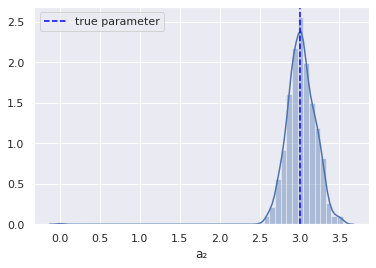

In [93]:
d1 = sns.distplot(param_fits.loc[:,'a\N{SUBSCRIPT TWO}'], bins=50)
plt.axvline(3, color='blue', ls='dashed', label = 'true parameter', lw=1.5)
plt.legend()

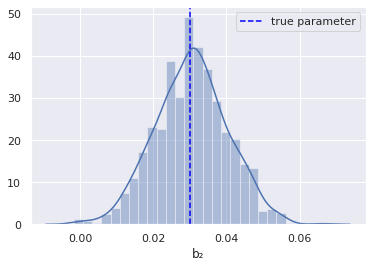

In [95]:
d2 = sns.distplot(param_fits.loc[:,'b\N{SUBSCRIPT TWO}'])
plt.axvline(0.03, color='blue', ls='dashed', label = 'true parameter', lw=1.5)
plt.legend()


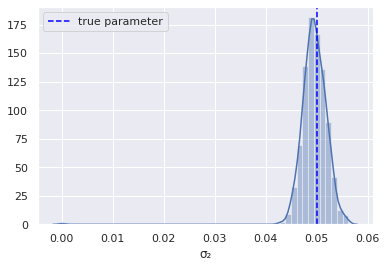

In [96]:
d3 = sns.distplot(param_fits.loc[:,'\u03C3\N{SUBSCRIPT TWO}'])
plt.axvline(0.05, color='blue', ls='dashed', label = 'true parameter', lw=1.5)
plt.legend()
d3